In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# for jupyter
%matplotlib inline 

dt = pd.read_csv('Dataset/heart.csv')
"""
font: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Attribute Information
    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
"""      
print(dt.shape)
print(dt.info())
dt.head(100)

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [32]:
""" convert object datatype to decimal """
#Sex
dt["Sex"] = dt["Sex"].apply(lambda x: 1 if x == 'M' else 0)
#ChestPainTypes - criar colunas para yes/no
ChestPainTypes = ["TA","ATA","NAP","ASY"]
dt["ChestPainType"] = dt["ChestPainType"].apply(lambda x: ChestPainTypes.index(x))


In [33]:
dt.head(30)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0
3,48,0,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0
5,39,1,2,120,339,0,Normal,170,N,0.0,Up,0
6,45,0,1,130,237,0,Normal,170,N,0.0,Up,0
7,54,1,1,110,208,0,Normal,142,N,0.0,Up,0
8,37,1,3,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,0,1,120,284,0,Normal,120,N,0.0,Up,0


In [36]:
dt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'ChestPainType'}>],
       [<AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FastingBS'}>],
       [<AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>,
        <AxesSubplot:title={'center':'HeartDisease'}>]], dtype=object)

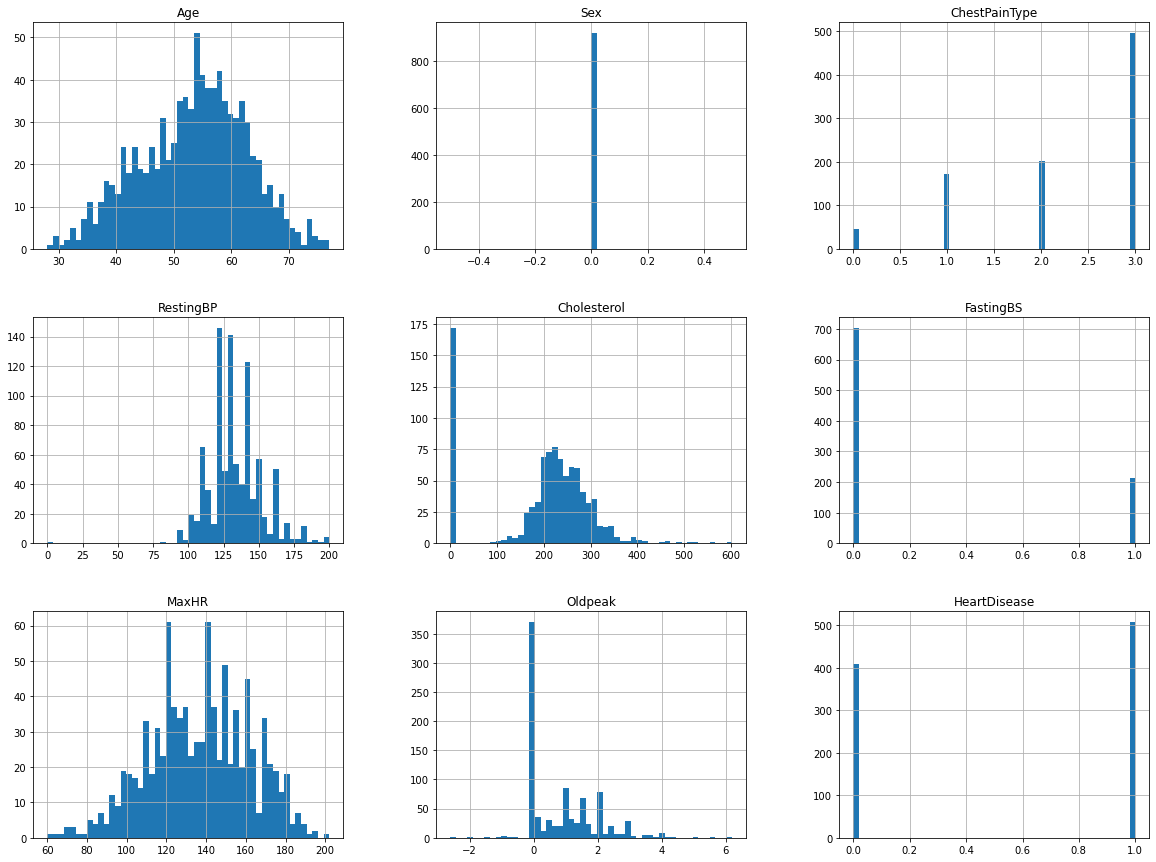

In [17]:
dt.hist(bins=50,figsize=(20,15))

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>,
        <AxesSubplot:xlabel='ChestPainType', ylabel='Age'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Age'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Age'>,
        <AxesSubplot:xlabel='FastingBS', ylabel='Age'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='Age'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='Age'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Sex'>,
        <AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='ChestPainType', ylabel='Sex'>,
        <AxesSubplot:xlabel='RestingBP', ylabel='Sex'>,
        <AxesSubplot:xlabel='Cholesterol', ylabel='Sex'>,
        <AxesSubplot:xlabel='FastingBS', ylabel='Sex'>,
        <AxesSubplot:xlabel='MaxHR', ylabel='Sex'>,
        <AxesSubplot:xlabel='Oldpeak', ylabel='Sex'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='Sex'>],
       [

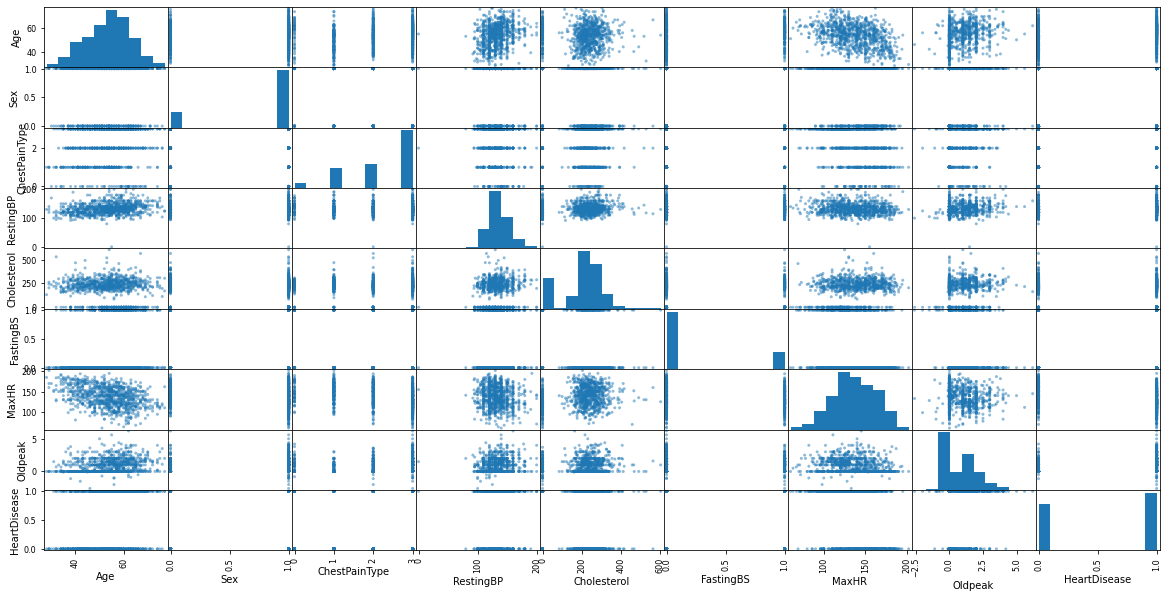

In [56]:
pd.plotting.scatter_matrix(dt, figsize=(20,10))

In [74]:
columns = dt.columns[:-1] # -1 = ['HeartDisease']
print(columns)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


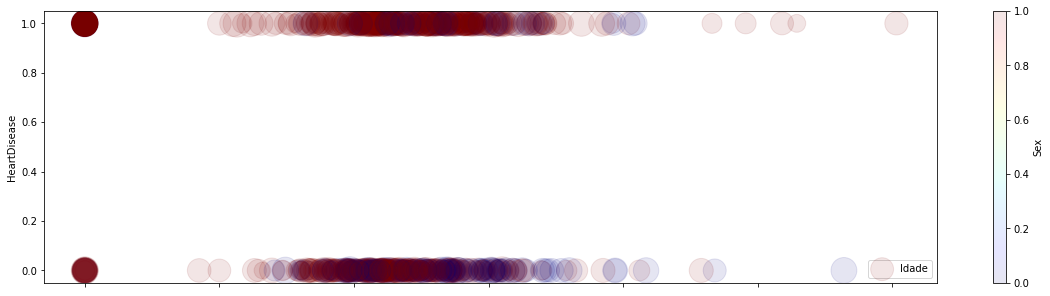

In [59]:
dt.plot(kind="scatter", y="HeartDisease", x="Cholesterol", alpha=0.1,
s=dt["Age"]*10, label="Idade",
c="Sex",
cmap=plt.get_cmap("jet"), colorbar=True,
figsize=(20,5)
)
plt.legend()

In [28]:
dt['Sex'] == 'F'

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Sex, Length: 918, dtype: bool

In [34]:
print(lambda y:y > 100)

<function <lambda> at 0x7fc26204e3b0>


In [43]:
lista = [(1,0),(2,3),(4,5),(1000,20000),(30000,4000)]
lista.sort(key=lambda x: x[1] - x[0])
print(lista)
    

[(30000, 4000), (1, 0), (2, 3), (4, 5), (1000, 20000)]


<AxesSubplot:xlabel='Age', ylabel='percent'>

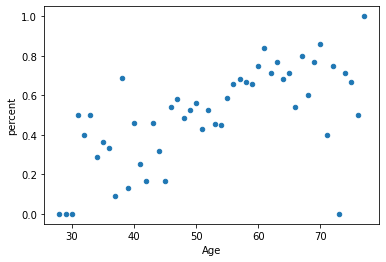

In [116]:
# dt['age per disease']

#dt['Age']
#dt['HeartDisease']
class Tage():
    def __init__(self, _age, doente):
        self.age = _age
        self.qtd = 0
        self.doencas = 0
        self.AdicionaPeople(doente)
        self.percent = 0
    def AdicionaPeople(self,doente):
        self.qtd+=1
        if (doente):
            self.doencas+=1
        self.percent = self.doencas/self.qtd
            
    def __str__(self):
        return 'Age:'+str(self.age)+"  "+str(self.doencas)+" de "+str(self.qtd)+" = "+str(self.percent)
    tur
    def __eq__(self,b):
        return self.age == b

    
# idade_28 = Tage(28)

#print(idade_28)
#t = dt.copy()
# t.groupby(['Age'])['Age'].agg('count')
pessoas = []
for i in dt.index:
    idade = dt['Age'][i]
    doente = dt['HeartDisease'][i]
    if idade in pessoas:        
        indice = pessoas.index(idade)
        pessoas[indice].AdicionaPeople(doente)

    else:
        pessoas.append(Tage(idade,doente))
    

idades = [ i.age for i in pessoas]
qtds = [i.qtd for i in pessoas]
percent = [i.percent for i in pessoas]

# print(qtds)
dataset = pd.DataFrame()
dataset['Age'] = idades
dataset['percent'] = percent

dataset.plot(kind = 'scatter', x='Age',y='percent')


In [130]:

    
class TCholesterol():
    def __init__(self, Cholesterol, doente):
        self.Cholesterol = Cholesterol
        self.qtd = 0
        self.doencas = 0
        self.AdicionaPeople(doente)
        self.percent = 0
    def AdicionaPeople(self,doente):
        self.qtd+=1
        if (doente):
            self.doencas+=1
        self.percent = self.doencas/self.qtd
            
    # def __str__(self):       return 'Age:'+str(self.Cholesterol)+"  "+str(self.doencas)+" de "+str(self.qtd)+" = "+str(self.percent)
 
    def __eq__(self,b):
        return self.Cholesterol == b

Cholesterols = []
for i in dt.index:
    Cholesterol = dt['Cholesterol'][i]
    doente = dt['HeartDisease'][i]
    if idade in pessoas:        
        indice = pessoas.index(idade)
        Cholesterols[indice].AdicionaPeople(doente)

    else:
        Cholesterols.append(TCholesterol(Cholesterol,doente))
    

idades = [ i.Cholesterol for i in Cholesterols]
qtds = [i.qtd for i in Cholesterols]
percent = [i.percent for i in Cholesterols]

print(idades)
"""
dataset = pd.DataFrame()
dataset['Cholesterol'] = idades
dataset['percent'] = percent

dataset.plot(kind = 'scatter', x='Cholesterol',y='percent')   
    

# dt.plot(kind = 'scatter',x='Cholesterol',y='HeartDisease')
"""

[289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204, 234, 211, 273, 196, 201, 248, 267, 223, 184, 201, 288, 215, 209, 260, 284, 468, 188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294, 264, 259, 175, 318, 223, 216, 340, 289, 233, 205, 224, 245, 180, 194, 270, 213, 365, 342, 253, 254, 224, 277, 202, 260, 297, 225, 246, 412, 265, 215, 182, 218, 268, 163, 529, 167, 100, 206, 277, 238, 223, 196, 213, 139, 263, 216, 291, 229, 208, 307, 210, 329, 182, 263, 207, 147, 85, 269, 275, 179, 392, 466, 186, 260, 254, 214, 129, 241, 188, 255, 276, 297, 207, 246, 282, 338, 160, 156, 248, 272, 240, 393, 230, 246, 161, 163, 230, 228, 292, 202, 388, 230, 294, 265, 215, 241, 166, 247, 331, 341, 291, 243, 279, 273, 198, 249, 168, 603, 215, 159, 275, 270, 291, 342, 190, 185, 290, 195, 264, 212, 263, 196, 225, 272, 231, 238, 222, 179, 243, 235, 320, 187, 266, 288, 216, 287, 194, 238, 225, 224, 404, 238, 312, 211, 251, 237, 328, 285, 280, 209, 245, 192, 184, 193, 297, 268, 246, 308, 

"\ndataset = pd.DataFrame()\ndataset['Cholesterol'] = idades\ndataset['percent'] = percent\n\ndataset.plot(kind = 'scatter', x='Cholesterol',y='percent')   \n    \n\n# dt.plot(kind = 'scatter',x='Cholesterol',y='HeartDisease')\n"

In [121]:
for i in range(0,10):
    print(i,i/16)

0 0.0
1 0.0625
2 0.125
3 0.1875
4 0.25
5 0.3125
6 0.375
7 0.4375
8 0.5
9 0.5625


In [143]:
colesterol0 = dt['Cholesterol']== 0

In [149]:
colesterol0.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Cholesterol, Length: 918, dtype: bool